<a href="https://colab.research.google.com/github/Nil1205/PANDAS/blob/main/3_%C3%A7al%C4%B1%C5%9FmaDAwPy_EDA_Project_(Analyze_US_Citizens)_Student_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align: center"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from file

In [2]:
df = pd.read_csv("adult_eda.csv")

# Try to undersstand what the data looks like? What are types of the features? Are there any missing values? Do I need to eliminate some features?  

In [3]:

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
len(df.index), len(df.columns)

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,31759.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.082843,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.576172,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1.BAKACAĞIM YAPAMADIM

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

---
---

# Look at the value counts of columns that have object datatype and replace '?' like values with 'Unknown' word.  

In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

2.BAKACAĞIM YARIM YAPTIM

In [8]:
df.select_dtypes("object").agg(["count", "nunique"])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,27493,32561,32561,32561,32561
nunique,9,16,7,15,5,5,2,42,2


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,27493,32561,32561,32561,32561
unique,9,16,7,15,5,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [9]:
#look at workclass column here
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [10]:
df["workclass"] = df["workclass"].astype(str).str.replace("\?", "unknown", regex=True)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,?,180211,Some-college,10.0,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4.0,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10.0,Never-married,?,NaN,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6.0,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6.0,Never-married,?,NaN,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13.0,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13.0,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,NaN,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9.0,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [11]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
#replace all '?' in whole df with 'Unknown'


In [12]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.0,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


---
---

# Do education and education_num columns hold similar information? If so drop the appropriate choice between them.

In [13]:
df.education

0         Bachelors
1         Bachelors
2           HS-grad
3              11th
4         Bachelors
            ...    
32556    Assoc-acdm
32557       HS-grad
32558       HS-grad
32559       HS-grad
32560       HS-grad
Name: education, Length: 32561, dtype: object

In [14]:
df["education-num"]

0        13.0
1        13.0
2         9.0
3         7.0
4        13.0
         ... 
32556    12.0
32557     9.0
32558     9.0
32559     9.0
32560     9.0
Name: education-num, Length: 32561, dtype: float64

In [15]:
df.groupby(["education","education-num"])["salary"].count()

education     education-num
10th          6.0                916
11th          7.0               1146
12th          8.0                424
1st-4th       2.0                161
5th-6th       3.0                330
7th-8th       4.0                631
9th           5.0                503
Assoc-acdm    12.0              1044
Assoc-voc     11.0              1343
Bachelors     13.0              5247
Doctorate     16.0               405
HS-grad       9.0              10215
Masters       14.0              1687
Preschool     1.0                 50
Prof-school   15.0               559
Some-college  10.0              7098
Name: salary, dtype: int64

In [16]:
df.groupby("education-num")["salary"].count().sort_values(ascending=False)

education-num
9.0     10215
10.0     7098
13.0     5247
14.0     1687
11.0     1343
7.0      1146
12.0     1044
6.0       916
4.0       631
15.0      559
5.0       503
8.0       424
16.0      405
3.0       330
2.0       161
1.0        50
Name: salary, dtype: int64

In [ ]:
#drop one of them here


3.YAPAMADIM ANLAMADIM


age                  0
workclass            0
fnlwgt               0
education            0
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

---
---

# Take a look at correlation between variables and also see if there are some outliers in any of the columns.

In [17]:
df.drop("education-num", axis=1, inplace=True)

In [18]:
df.corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,0.000432,-0.010252,-0.018768
capital-gain,0.077674,0.000432,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.078409,0.054256,1.000000


In [19]:
df.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


In [20]:
q3=df.age.quantile(0.75)
q3

48.0

In [21]:
#age column
IQR=df.age.quantile(0.75)-df.age.quantile(0.25)
IQR

20.0

In [22]:
upper_lim= q3+1.5*IQR
upper_lim

78.0

In [26]:
df[df["age"] >=upper_lim]["age"].value_counts()

90    43
78    23
79    22
80    22
81    20
82    12
84    10
83     6
88     3
85     3
86     1
87     1
Name: age, dtype: int64

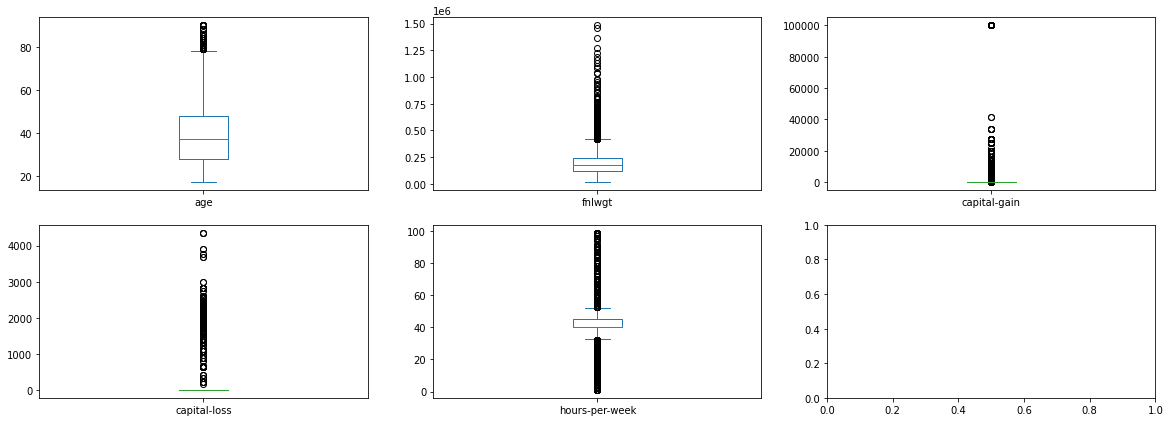

In [27]:
fig ,ax = plt.subplots(2,3,figsize=(20,7))
x = 0
y = 0
for column in df.select_dtypes('number').columns:
    
    df[column].plot(kind = "box", ax = ax[x,y])
    if y < 2:
        y += 1
    else:
        x += 1
        y = 0

In [28]:
df[(df["hours-per-week"] == 99)].sample(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
8072,44,Self-emp-not-inc,26669,Assoc-acdm,Married-civ-spouse,Other-service,Wife,White,Female,0,0,99,United-States,<=50K
26858,66,Private,262285,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,United-States,<=50K
23830,45,Self-emp-not-inc,106110,Some-college,Married-civ-spouse,Other-service,Wife,White,Female,0,0,99,United-States,<=50K
19399,39,Self-emp-inc,163057,Some-college,Divorced,Craft-repair,Not-in-family,White,Male,0,0,99,United-States,<=50K
28112,61,unknown,158712,HS-grad,Divorced,?,Not-in-family,White,Female,0,0,99,United-States,<=50K
29187,31,Private,178370,HS-grad,Divorced,Other-service,Unmarried,White,Female,0,0,99,United-States,>50K
6898,53,Self-emp-not-inc,151159,10th,Married-spouse-absent,Transport-moving,Not-in-family,White,Male,0,0,99,United-States,<=50K
31699,43,Self-emp-not-inc,163108,Some-college,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K
18603,33,Self-emp-not-inc,67482,Assoc-voc,Divorced,Other-service,Unmarried,White,Female,0,0,99,United-States,<=50K
27809,30,Private,39386,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,99,United-States,<=50K


In [29]:
q3_h=df["hours-per-week"].quantile(0.75)
q3_h

45.0

In [30]:
q1_h=df["hours-per-week"].quantile(0.25)
q1_h

40.0

In [32]:
#hours per week column
IQR_h=q3_h-q1_h
IQR_h

5.0

In [33]:
upper_lim_h=q3_h+1.5*IQR_h
upper_lim_h

52.5

In [ ]:
# find outlier values which extends the upper limit in both age and hours-per-week columns

In [34]:
not_outliers =(df.age >= upper_lim)

In [35]:
df[not_outliers].sample(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
26731,84,Private,188328,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,0,0,16,United-States,<=50K
19495,81,Self-emp-inc,247232,10th,Married-civ-spouse,Exec-managerial,Wife,White,Female,2936,0,28,United-States,<=50K
2303,90,Private,52386,Some-college,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
8694,80,unknown,29020,Prof-school,Married-civ-spouse,?,Husband,White,Male,10605,0,10,United-States,>50K
8431,82,Private,152148,7th-8th,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,2,United-States,<=50K
12451,90,unknown,225063,Some-college,Never-married,?,NaN,Asian-Pac-Islander,Male,0,0,10,South,<=50K
2906,81,Private,114670,9th,Widowed,Priv-house-serv,Not-in-family,Black,Female,2062,0,5,United-States,<=50K
31836,80,unknown,281768,Assoc-acdm,Married-civ-spouse,?,Husband,White,Male,0,0,4,United-States,<=50K
12830,81,Private,201398,Masters,Widowed,Prof-specialty,Unmarried,White,Male,0,0,60,?,<=50K
12975,90,Private,250832,10th,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K


In [36]:
not_outliers_h =(df["hours-per-week"] >= upper_lim_h)

In [37]:
df[not_outliers_h].sample(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
13929,32,Self-emp-not-inc,103642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,<=50K
22293,45,Self-emp-not-inc,28497,Bachelors,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,1485,70,United-States,>50K
8013,45,Private,205424,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,0,65,United-States,>50K
17554,34,Private,141118,Masters,Divorced,Prof-specialty,NaN,White,Female,0,0,60,United-States,>50K
4458,26,Self-emp-not-inc,213258,HS-grad,Divorced,Farming-fishing,Unmarried,White,Male,0,0,65,United-States,<=50K
10476,56,Private,157749,Some-college,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,>50K
19298,65,Self-emp-not-inc,139960,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,10605,0,60,United-States,>50K
27322,38,Private,184801,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
29787,44,Private,186916,Some-college,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1887,60,United-States,>50K
32169,25,Private,149943,HS-grad,Never-married,Other-service,Other-relative,Asian-Pac-Islander,Male,4101,0,60,?,<=50K


# After looking at the outliers you can drop the rows which actually does not make any sense. 
** Hint: You can check age and hours per week columns. **

In [38]:
drop_index=df.loc[(df["age"]>=upper_lim)|(df["hours-per-week"]>=upper_lim_h)].index
drop_index

Int64Index([   10,    20,    27,    28,    52,    53,    54,    64,    72,
               74,
            ...
            32500, 32506, 32520, 32523, 32525, 32530, 32531, 32532, 32536,
            32548],
           dtype='int64', length=3648)

In [39]:
df.drop(drop_index, inplace=True)

In [ ]:
# check outlier values which extends the upper limit in both age and hours-per-week columns

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


In [40]:
df.sample(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
10254,31,Private,204752,12th,Never-married,Sales,NaN,White,Male,0,0,32,United-States,<=50K
494,33,Private,178107,Bachelors,Never-married,Craft-repair,NaN,White,Male,0,0,20,United-States,<=50K
17979,22,Private,51362,Bachelors,Never-married,Sales,Not-in-family,White,Female,0,0,16,United-States,<=50K
6440,24,Self-emp-not-inc,161508,HS-grad,Never-married,Craft-repair,NaN,White,Male,0,0,50,United-States,<=50K
14608,23,Private,62278,HS-grad,Never-married,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
13570,40,Private,222011,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,3325,0,40,United-States,<=50K
4249,68,Private,253866,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,0,0,30,United-States,<=50K
12831,37,Private,526968,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,38,United-States,>50K
28811,23,unknown,343553,11th,Never-married,?,Not-in-family,Black,Male,0,0,40,United-States,<=50K
15552,35,Private,98948,Bachelors,Married-civ-spouse,Other-service,Wife,White,Female,0,0,32,United-States,<=50K


# Impute missing values in relationship column with 'Unmarried'. Also replace 'Not-in-family','Other-relative' values in this column with 'Unmarried'?

In [44]:
df["relationship"]=df["relationship"].fillna("Unmarried")

In [43]:
df["relationship"].value_counts()

Husband           10987
Unmarried          8087
Not-in-family      7421
Wife               1487
Other-relative      931
Name: relationship, dtype: int64

In [45]:
df["relationship"]=df["relationship"].replace("Not-in-family", "Unmarried")

In [46]:
df["relationship"]=df["relationship"].replace("Other-relative", "Unmarried")

In [47]:
df["relationship"].value_counts()

Unmarried    16439
Husband      10987
Wife          1487
Name: relationship, dtype: int64

---
# How many of each race are represented in this dataset?
---

In [48]:
race_count=df.race.value_counts()
race_count

White                 24501
Black                  2959
Asian-Pac-Islander      924
Amer-Indian-Eskimo      278
Other                   251
Name: race, dtype: int64

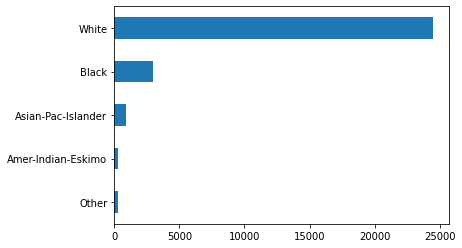

In [49]:
race_count.sort_values().plot.barh();

---
# What is the average age of men/women?
---

In [50]:
average_age_men=df.groupby("sex")["age"].mean()[1]
average_age_men

38.990811474971956

In [51]:
round(average_age_men,1)

39.0

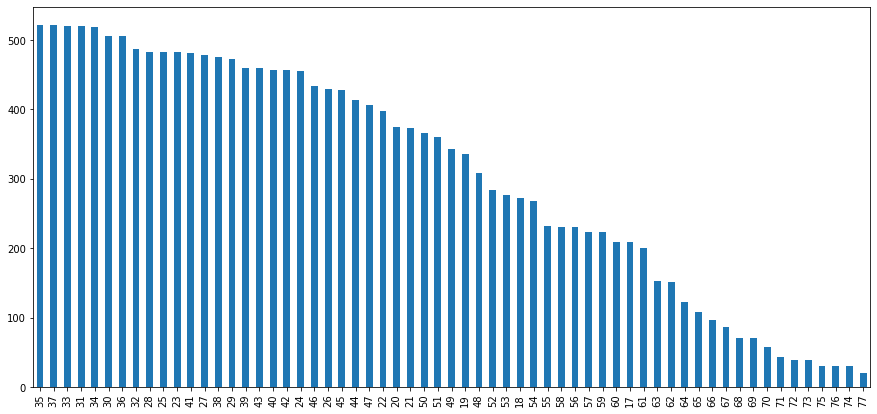

In [52]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Male", "age"].value_counts().plot.bar();

In [53]:
average_age_women=df.groupby("sex")["age"].mean()[0]
average_age_women

36.49225034333922

In [54]:
round(average_age_women,1)

36.5

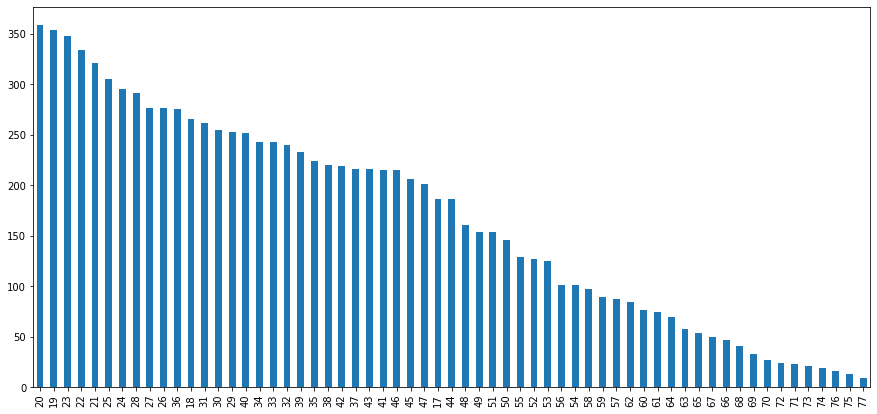

In [55]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Female", "age"].value_counts().plot.bar();

---
# What is the percentage of people who have a Bachelor's degree?
---

4.BAKACAĞIM

In [59]:
education_list=df.education.value_counts()
education_list

HS-grad         9486
Some-college    6584
Bachelors       4616
Masters         1423
Assoc-voc       1226
11th            1097
Assoc-acdm       953
10th             859
7th-8th          566
9th              490
12th             411
Prof-school      400
5th-6th          308
Doctorate        296
1st-4th          150
Preschool         48
Name: education, dtype: int64

In [58]:
df.education.count()

28913

education
10th              933
11th             1175
12th              433
1st-4th           168
5th-6th           333
7th-8th           645
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5353
Doctorate         413
HS-grad         10499
Masters          1720
Preschool          51
Prof-school       575
Some-college     7290
Name: education, dtype: int64

HS-grad         10499
Some-college     7290
Bachelors        5353
Masters          1720
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       575
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [60]:
upper=education_list.max()
upper

9486

In [61]:
lower=education_list.min()
lower

48

5.BAKACAĞIM

In [62]:
percentage_bachelors = (upper/lower) * 100

percentage_bachelors

19762.5

In [ ]:
upper =

lower =

percentage_bachelors = upper / lower * 100

percentage_bachelors

16.444963288378236

In [63]:
df["education"].value_counts(normalize=True)

HS-grad         0.328088
Some-college    0.227718
Bachelors       0.159651
Masters         0.049217
Assoc-voc       0.042403
11th            0.037941
Assoc-acdm      0.032961
10th            0.029710
7th-8th         0.019576
9th             0.016947
12th            0.014215
Prof-school     0.013835
5th-6th         0.010653
Doctorate       0.010238
1st-4th         0.005188
Preschool       0.001660
Name: education, dtype: float64

In [64]:
percentage_bachelors = df["education"].value_counts(normalize=True).loc["Bachelors"]*100
round(percentage_bachelors,1)

16.0

In [65]:
print(f"The percentage of people who have a Bachelor's degree : %{round(percentage_bachelors,1)}")

The percentage of people who have a Bachelor's degree : %16.0


---
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
---

**FAZLALIK VAR

In [66]:
df.groupby(df["education"]==df["education"].isin(["Bachelors", "Masters", "Doctorate"]))["salary"].value_counts()

education  salary
False      <=50K     22552
           >50K       6361
Name: salary, dtype: int64

In [67]:
df.education.value_counts()

HS-grad         9486
Some-college    6584
Bachelors       4616
Masters         1423
Assoc-voc       1226
11th            1097
Assoc-acdm       953
10th             859
7th-8th          566
9th              490
12th             411
Prof-school      400
5th-6th          308
Doctorate        296
1st-4th          150
Preschool         48
Name: education, dtype: int64

In [68]:
higher_education = df["education"].isin(["Bachelors", "Masters", "Doctorate"])
higher_education

0         True
1         True
2        False
3        False
4         True
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: education, Length: 28913, dtype: bool

In [243]:
df_high_edu =df[(df["education"].isin(["Bachelors", "Masters", "Doctorate"]))]
df_high_edu 

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Occuppationd
0,39,State-gov,77516,Bachelors,Never-married,NaN,Unmarried,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,13,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN
5,37,Private,284582,Masters,Married-civ-spouse,NaN,Wife,White,Female,0,0,40,United-States,<=50K,NaN
8,31,Private,45781,Masters,Never-married,NaN,Unmarried,White,Female,14084,0,50,United-States,>50K,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,Divorced,NaN,Unmarried,Black,Female,15020,0,45,United-States,>50K,NaN
32539,71,unknown,287372,Doctorate,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K,NaN
32544,31,Private,199655,Masters,Divorced,NaN,Unmarried,Other,Female,0,0,30,United-States,<=50K,NaN
32553,32,Private,116138,Masters,Never-married,NaN,Unmarried,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K,NaN


In [241]:
df[(df["education"].isin(["Bachelors", "Masters", "Doctorate"]))& (df["salary"]== ">50K")]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Occuppationd
8,31,Private,45781,Masters,Never-married,NaN,Unmarried,White,Female,14084,0,50,United-States,>50K,NaN
9,42,Private,159449,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,5178,0,40,United-States,>50K,NaN
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,Prof-specialty
19,43,Self-emp-not-inc,292175,Masters,Divorced,NaN,Unmarried,White,Female,0,0,45,United-States,>50K,NaN
25,56,Local-gov,216851,Bachelors,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,>50K,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32513,46,Private,42972,Masters,Married-civ-spouse,NaN,Wife,White,Female,0,0,22,United-States,>50K,NaN
32533,54,Private,337992,Bachelors,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K,NaN
32538,38,Private,139180,Bachelors,Divorced,NaN,Unmarried,Black,Female,15020,0,45,United-States,>50K,NaN
32539,71,unknown,287372,Doctorate,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K,NaN


In [245]:
high_edu_index=df[(df["education"].isin(["Bachelors", "Masters", "Doctorate"]))& (df["salary"]== ">50K")].index
high_edu_index

Int64Index([    8,     9,    11,    19,    25,    45,    63,    89,    94,
              100,
            ...
            32457, 32458, 32464, 32480, 32504, 32513, 32533, 32538, 32539,
            32554],
           dtype='int64', length=2796)

In [246]:
high_count=len(high_edu_index)
high_count

2796

In [247]:
tot_count=len(df.education.index)
tot_count

28913

In [248]:
perc_high_edu =high_count/tot_count
perc_high_edu

0.09670390481790198

7.AYNI SONUÇ CIKMADI TEKRAR BAK

In [249]:
perc_high_edu

0.09670390481790198

In [250]:
print(f"Percentage of people with advanced education make more than 50K : {round(perc_high_edu * 100, 2)}")

Percentage of people with advanced education make more than 50K : 9.67


---
# What percentage of people without advanced education make more than 50K?
---

In [ ]:
lower_education=(~df["education"].isin(["Bachelors", "Masters", "Doctorate"]))

In [95]:
lower_education=df[(~df["education"].isin(["Bachelors", "Masters", "Doctorate"]))&(df["salary"]<="50K")]


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


In [84]:
df_low_edu = df[lower_education]
df_low_edu

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
6,49,Private,160187,9th,Married-spouse-absent,Other-service,Unmarried,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
13,32,Private,205019,Assoc-acdm,Never-married,Sales,Unmarried,Black,Male,0,0,50,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Unmarried,White,Male,0,0,20,United-States,<=50K


In [85]:
high_edu_index=df.loc[~(df["education"].isin(["Bachelors", "Masters", "Doctorate"]))].index

In [88]:
lower_tot=len(high_edu_index)

In [89]:
tot=len(df.education.index)

In [90]:
perc_low_edu = lower_tot/tot
perc_low_edu

0.780894407360011

In [ ]:
perc_low_edu = 

In [91]:
print(f"Percentage of people without advanced education make more than 50K : {round(perc_low_edu * 100 ,2)}")

Percentage of people without advanced education make more than 50K : 78.09


In [ ]:
if perc_high_edu > perc_low_edu :
    print("More education more money!")
else:
    print("Education has no clear effet on salary. You should investigate some other features also.")

Education has no clear effet on salary. You should investigate some other features also.


---
# What percentage of the people who work the minimum number of hours per week have a salary of >50K?
---

In [182]:
df[(df["salary"] == ">50K")&(df["hours-per-week"]=="1")].index

Int64Index([], dtype='int64')

40    15217
50     2819
45     1824
60     1471
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: hours-per-week, Length: 94, dtype: int64

In [177]:
lazy_riches = [(df["salary"] == ">50K")&(df["hours-per-week"]=="1")]
lazy_riches

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 32556    False
 32557    False
 32558    False
 32559    False
 32560    False
 Length: 28913, dtype: bool]

In [ ]:
df[(df["salary"] == ">50K")&(df["hours-per-week"]=="1")]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
189,58,State-gov,109567,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K
20072,65,Unknown,76043,HS-grad,Married-civ-spouse,Unknown,Husband,White,Male,0,0,1,United-States,>50K


In [185]:
df[(df["hours-per-week"]=="1")]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Occuppationd


In [ ]:
num_lazy_riches = 
num_lazy_riches

2

In [ ]:
num_min_workers = 
num_min_workers

20

In [186]:
print (f"Percentage of the people who work the minimum number of hours per week have a salary of >50K : % {round(num_lazy_riches/num_min_workers*100)}")

NameError: ignored

 ---
 # What country has the highest percentage of people that earn >50K?
 ---


tabloya verileri yanlış tekrar bakılacak

In [197]:
country_salary_df =df.groupby("native-country")[["salary"]].count()
country_salary_df 

,salary
native-country,
?,505
Cambodia,19
Canada,102
China,71
Columbia,57
Cuba,88
Dominican-Republic,62
Ecuador,24
El-Salvador,102


In [ ]:
country_salary_df_riches = df[df["salary"] == ">50K"][["native-country"]].value_counts()
country_salary_df_riches 

In [198]:
country_salary_df_riches = df[df["salary"] == ">50K"][["native-country"]].value_counts()
country_salary_df_riches 

native-country    
United-States         5816
?                      116
Philippines             55
Germany                 37
India                   33
Canada                  30
Mexico                  26
England                 24
Cuba                    20
Japan                   20
Italy                   20
China                   19
Taiwan                  14
Iran                    13
Puerto-Rico             12
Poland                  11
Jamaica                 10
France                  10
South                   10
Cambodia                 7
El-Salvador              6
Greece                   5
Hong                     5
Vietnam                  5
Portugal                 4
Yugoslavia               4
Haiti                    3
Guatemala                3
Ecuador                  3
Ireland                  3
Peru                     2
Nicaragua                2
Laos                     2
Hungary                  2
Scotland                 2
Thailand                 2
Trinadad&

In [233]:
country_salary_df.loc[["Iran"]]

,salary
native-country,
Iran,34


In [235]:
country_salary_df.iloc[[20]]

,salary
native-country,
Iran,34


In [228]:
country_salary_df_riches.iloc[14]

12

In [ ]:
#use iloc here

,salary
native-country,
Iran,0.418605


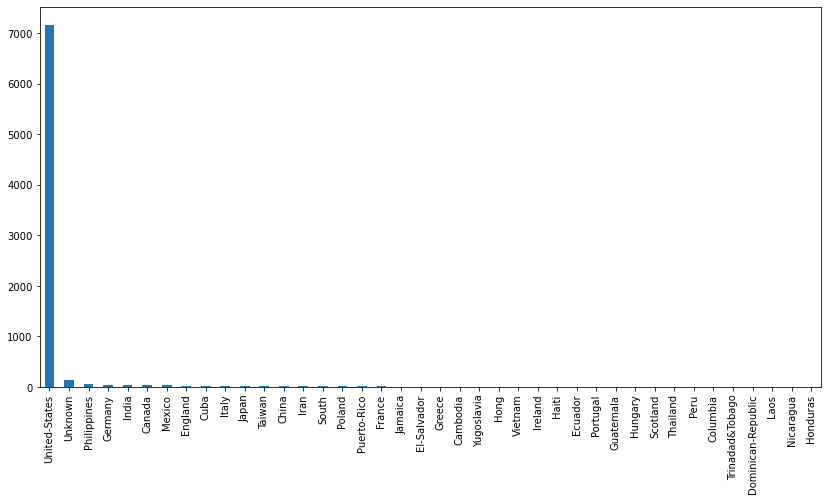

In [ ]:
plt.figure(figsize=(14,7))
df.loc[df["salary"] == ">50K", "native-country"].value_counts().plot(kind="bar");

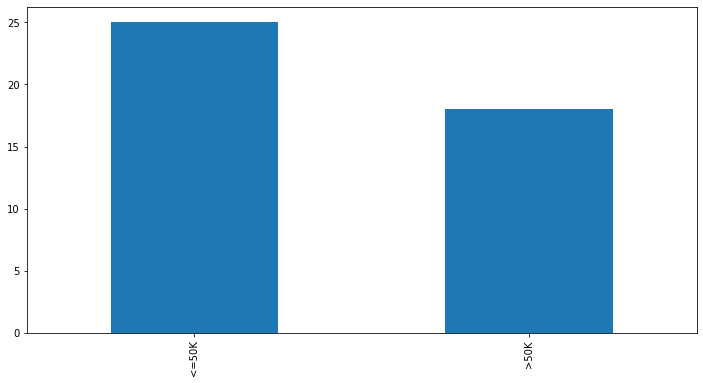

In [ ]:
plt.figure(figsize=(12,6))
df.loc[((df["native-country"] == "Iran")), "salary"].value_counts().plot.bar();

---
# Identify the most popular occupation for those who earn >50K in India.
---

In [142]:
top_IN_occupation=[(df["native-country"]=="India")&(df["salary"] ==">50K")]
top_IN_occupation

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 32556    False
 32557    False
 32558    False
 32559    False
 32560    False
 Length: 28913, dtype: bool]

In [145]:
df[(df["native-country"]=="India")&(df["salary"] ==">50K")]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,Occuppationd
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,Prof-specialty
968,48,Private,164966,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,Exec-managerial
1327,52,Private,168381,HS-grad,Widowed,Other-service,Unmarried,Asian-Pac-Islander,Female,0,0,40,India,>50K,Other-service
7285,54,State-gov,93449,Masters,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,Prof-specialty
8124,36,Private,172104,Prof-school,Never-married,Prof-specialty,Unmarried,Other,Male,0,0,40,India,>50K,Prof-specialty
9939,43,Federal-gov,325706,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,50,India,>50K,Prof-specialty
10590,35,Private,98283,Prof-school,Never-married,Prof-specialty,Unmarried,Asian-Pac-Islander,Male,0,0,40,India,>50K,Prof-specialty
10661,59,Private,122283,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,99999,0,40,India,>50K,Prof-specialty
10736,30,Private,243190,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,20,India,>50K,Prof-specialty
11260,54,Private,225599,Masters,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,7298,0,40,India,>50K,Prof-specialty


In [154]:
oc_list=df[(df["native-country"]=="India")&(df["salary"] ==">50K")]["occupation"].value_counts()
oc_list

Prof-specialty      20
Exec-managerial      7
Tech-support         2
Other-service        1
Transport-moving     1
Sales                1
Adm-clerical         1
Name: occupation, dtype: int64

In [162]:
a = oc_list.head(1)
a

Prof-specialty    20
Name: occupation, dtype: int64

In [170]:
a=df["occupation"].mode()[0]
a

'Prof-specialty'

In [171]:
print(f"{a} the most popular occupation for those who earn >50K in India.")

Prof-specialty the most popular occupation for those who earn >50K in India.


----
---